In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

### Implement PCA manually

### 1.1 Standardize the data

In [6]:
iris = datasets.load_iris()
X = iris.data          
y = iris.target        
names = iris.target_names
X_std = StandardScaler().fit_transform(X)
Xc = X_std - X_std.mean(axis=0, keepdims=True)

### 1.2 Compute the covariance matrix

In [21]:
C = np.cov(Xc, rowvar=False, ddof=1)
C


array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

### 1.3 Find eigenvalues and eigenvectors

In [9]:
#Proyección a 2D
eigvals, eigvecs = np.linalg.eigh(C)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx] 
print("Eigenvalues (PCA manual):", eigvals)

Eigenvalues (PCA manual): [2.93808505 0.9201649  0.14774182 0.02085386]


### 1.4 Project onto the first 2 principal components

In [22]:
W2 = eigvecs[:, :2]    
Z_pca = Xc @ W2  
Z_pca.shape

(150, 2)

### 1.5 Plot the result

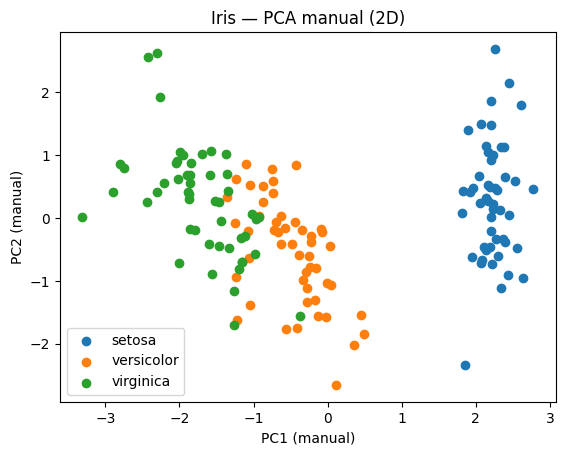

In [10]:
plt.figure()
for i, name in enumerate(names):
    m = (y == i)
    plt.scatter(Z_pca[m, 0], Z_pca[m, 1], label=name)
plt.xlabel("PC1 (manual)")
plt.ylabel("PC2 (manual)")
plt.title("Iris — PCA manual (2D)")
plt.legend()
plt.show()

### Implement PCA using SVD

### 2.1 SVD on the same centered dataset

In [11]:
U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
V = Vt.T    

### 2.2 Compare the first 2 right singular vectors with the PCA components

In [23]:
alignment = np.abs(np.diag(eigvecs.T @ V))
print("Alignment (abs cos) between PCA eigenvectors and SVD V:", alignment[:2])

Alignment (abs cos) between PCA eigenvectors and SVD V: [1. 1.]


### 2.3 Show that SVD explained variance matches PCA eigenvalues



**Setup**  
Let $$X_c \in \mathbb{R}^{n \times d}$$ be the centered data matrix (rows = samples).
The sample covariance matrix is:

$$
C = \frac{1}{n-1} X_c^T X_c
$$

**SVD**  
Take the Singular Value Decomposition (SVD) of \(X_c\):

$$
X_c = U S V^T
$$

where 
$$S = \mathrm{diag}(s_1, s_2, ..., s_{\min(n,d)})$$ 
contains the singular values.


**Derivation**

$$
C = \frac{1}{n-1} X_c^T X_c
     = \frac{1}{n-1} (V S U^T)(U S V^T)
     = \frac{1}{n-1} V S^2 V^T
$$

Therefore, \(C\) has eigenvectors given by the columns of \(V\), and its eigenvalues are:

$$
\lambda_i = \frac{s_i^2}{n-1}
$$

These 
$$\lambda_i$$ 
are exactly the **explained variance** values from SVD, which shows they match the **PCA eigenvalues**.


In [24]:
n = Xc.shape[0]
explained_var_svd = (S**2) / (n - 1)

print("Explained variance (SVD):", explained_var_svd)
print("Eigenvalues (PCA manual):", eigvals)
print("Match? ->", np.allclose(np.sort(explained_var_svd), np.sort(eigvals)))

Explained variance (SVD): [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvalues (PCA manual): [2.93808505 0.9201649  0.14774182 0.02085386]
Match? -> True


### Dimensionality reduction & visualization

### 3.1 Reduce to 2D with SVD

In [26]:
Z_svd = Xc @ V[:, :2]
Z_svd.shape

(150, 2)

### 3.2 Scatter plots (color by class/label)

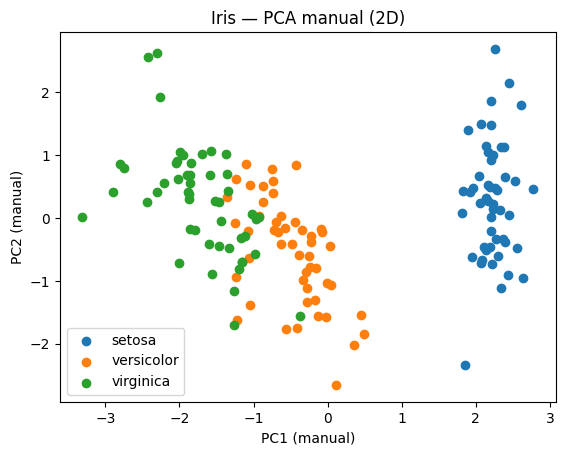

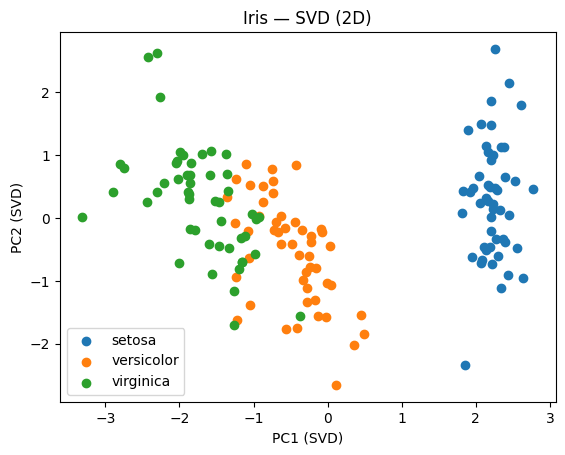

In [28]:
# PCA (manual)
plt.figure()
for i, name in enumerate(names):
    m = (y == i)
    plt.scatter(Z_pca[m, 0], Z_pca[m, 1], label=name)
plt.xlabel("PC1 (manual)")
plt.ylabel("PC2 (manual)")
plt.title("Iris — PCA manual (2D)")
plt.legend()
plt.show()

# SVD
plt.figure()
for i, name in enumerate(names):
    m = (y == i)
    plt.scatter(-Z_svd[m, 0], -Z_svd[m, 1], label=name)
plt.xlabel("PC1 (SVD)")
plt.ylabel("PC2 (SVD)")
plt.title("Iris — SVD (2D)")
plt.legend()
plt.show()


### 3.3 Compare results

**Directions:** The first two columns of **V** (from SVD) match the first two principal components
from **eigvecs** (manual PCA), up to a possible sign flip. The values in `alignment[:2]`
should be very close to **1.0**.

**Explained variance:** The eigenvalues from PCA (`eigvals`) match the explained variance from SVD,
given by:

$$
\text{explained\_var\_svd} = \frac{S^2}{n - 1}
$$

Small numerical differences are normal.

**Plots:** The 2D projections **Z_pca** and **Z_svd** look almost identical. Any difference.